Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 311
Code Title: | Computational Thinking with Python
Summer | 2024
| <hr></hr> | <hr></hr>
<u>**Hands-on Activity No. 10.1**</u> | <u>**Data Analysis with Python**</u>
**Name** | Sumilang, Kenneth
**Section** | CPE32S1
**Date Performed**: | 7/10/24
**Date Submitted**: | 7/10/24
**Instructor**: |Engr. Roman M. Richard


# Goal:
Perform descriptive and correlation analysis to analyze the dataset. Interpret the results of descriptive and correlation analysis.

## Process

### 1. Gather a dataset regarding your identified problem for the ASEAN Data Science Explorer. Make sure that the dataset includes multiple variables.

    For my datasets, I have chosen the HDI, ASEAN GDP per Capita, ASEAN Energy Consumption, Food Production, CO2 Emissions and ASEAN Forest Area datasets. I plan to aggregate these datasets together and explore if there are correlations between a combination of these 6 factors.



<center>Hypothesis Table</center>

|                         | GDP Per Capita | CO2 Emission | Energy Used | Food Production Index | Forest Area | HDI               |
|-------------------------|----------------|--------------|-------------|-----------------------|-------------|-------------------|
| **GDP Per Capita**      | N/A            | +            | +           | +                     | -           | +                 |
| **CO2 Emission**        | +              | N/A          | +           | o                     | -           | o                 |
| **Energy Used**         | +              | +            | N/A         | +                     | -           | +                 |
| **Food Production Index** | +              | o            | +           | N/A                   | -           | +                 |
| **Forest Area**         | -              | -            | -           | -                     | N/A         | o                 |
| **HDI**                 | +              | o            | +           | +                     | o           | N/A               |

**Legend:**
- **+** : Positive correlation
- **-** : Negative correlation
- **o** : No correlation
- **N/A** : Not applicable


### 2. Load the dataset into pandas dataframe.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the datasets with appropriate encoding
gdp_per_capita = pd.read_csv('GDP Per Capita.csv', encoding='ISO-8859-1')
co2_emission = pd.read_csv('co2 emission.csv', encoding='ISO-8859-1')
energy_used = pd.read_csv('energy used.csv', encoding='ISO-8859-1')
food_production_index = pd.read_csv('food production index.csv', encoding='ISO-8859-1')
forest_area = pd.read_csv('forest area.csv', encoding='ISO-8859-1')
hdi = pd.read_csv('HDI.csv', encoding='ISO-8859-1')

# Display the column names to inspect them
print("GDP Per Capita Columns:", gdp_per_capita.columns)
print("CO2 Emission Columns:", co2_emission.columns)
print("Energy Used Columns:", energy_used.columns)
print("Food Production Index Columns:", food_production_index.columns)
print("Forest Area Columns:", forest_area.columns)
print("HDI Columns:", hdi.columns)


GDP Per Capita Columns: Index(['Country ', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')
CO2 Emission Columns: Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')
Energy Used Columns: Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
 

### 3. Prepare the data by applying appropriate data preprocessing techniques. 


In [153]:
def preprocess_dataframe(df, dataset_name):
    # Assuming the first column is the country name
    if df.columns[0] != 'Country':
        df.rename(columns={df.columns[0]: 'Country'}, inplace=True)
    year_range = [str(year) for year in range(2000, 2012)]
    columns_to_keep = ['Country'] + [year for year in year_range if year in df.columns]
    df = df[columns_to_keep]
    
    # Handle missing values: Impute with column mean
    numeric_columns = df.select_dtypes(include=['number']).columns
    df.loc[:, numeric_columns] = df.loc[:, numeric_columns].fillna(df.loc[:, numeric_columns].mean())
    
    # Normalize the data (excluding the 'Country' column)
    scaler = StandardScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
    
    return df

### 4. Analyze the data using descriptive analysis.

In [154]:
#visualizing function
def plot_summary_statistics_by_country(df, value_name, title):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Country', y=value_name, data=df)
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel(value_name)
    plt.xticks(rotation=90)
    plt.show()

In [155]:
gdp_per_capita = preprocess_dataframe(gdp_per_capita, "GDP Per Capita")
co2_emission = preprocess_dataframe(co2_emission, "CO2 Emission")
energy_used = preprocess_dataframe(energy_used, "Energy Used")
food_production_index = preprocess_dataframe(food_production_index, "Food Production Index")
forest_area = preprocess_dataframe(forest_area, "Forest Area")
hdi = preprocess_dataframe(hdi, "HDI")

# Calculate summary statistics by country
gdp_summary_by_country = gdp_per_capita.groupby('Country').describe()
gdp_summary_by_country

C:\Users\ryzek\AppData\Local\Temp\ipykernel_34428\3218539282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, numeric_columns] = df.loc[:, numeric_columns].fillna(df.loc[:, numeric_columns].mean())
C:\Users\ryzek\AppData\Local\Temp\ipykernel_34428\3218539282.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
C:\Users\ryzek\AppData\Local\Temp\ipykernel_34428\3218539282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

2000                                                        \
                  count      mean std       min       25%       50%       75%   
Country                                                                         
Brunei Darussalam   1.0  1.597592 NaN  1.597592  1.597592  1.597592  1.597592   
Cambodia            1.0 -0.593021 NaN -0.593021 -0.593021 -0.593021 -0.593021   
Indonesia           1.0 -0.527468 NaN -0.527468 -0.527468 -0.527468 -0.527468   
Lao PDR             1.0 -0.590032 NaN -0.590032 -0.590032 -0.590032 -0.590032   
Malaysia            1.0 -0.129794 NaN -0.129794 -0.129794 -0.129794 -0.129794   
Myanmar             1.0 -0.606320 NaN -0.606320 -0.606320 -0.606320 -0.606320   
Philippines         1.0 -0.501696 NaN -0.501696 -0.501696 -0.501696 -0.501696   
Singapore           1.0  2.313146 NaN  2.313146  2.313146  2.313146  2.313146   
Thailand            1.0 -0.381864 NaN -0.381864 -0.381864 -0.381864 -0.381864   
Vietnam             1.0 -0.580544 NaN -0.580544 -0.580544 -0.580544 -0.580544   

                             2001            ...      2010            2011  \
                        max count      mean  ...       75%       max count   
Country                                      ...                             
Brunei Darussalam  1.597592   1.0  1.606232  ...  1.586799  1.586799   1.0   
Cambodia          -0.593021   1.0 -0.594100  ... -0.626609 -0.626609   1.0   
Indonesia         -0.527468   1.0 -0.529349  ... -0.477189 -0.477189   1.0   
Lao PDR           -0.590032   1.0 -0.593363  ... -0.603794 -0.603794   1.0   
Malaysia          -0.129794   1.0 -0.104362  ... -0.094756 -0.094756   1.0   
Myanmar           -0.606320   1.0 -0.618942  ... -0.613640 -0.613640   1.0   
Philippines       -0.501696   1.0 -0.507425  ... -0.540351 -0.540351   1.0   
Singapore          2.313146   1.0  2.302427  ...  2.312241  2.312241   1.0   
Thailand          -0.381864   1.0 -0.379895  ... -0.351261 -0.351261   1.0   
Vietnam           -0.580544   1.0 -0.581222  ... -0.591440 -0.591440   1.0   

                                                                         \
                       mean std       min       25%       50%       75%   
Country                                                                   
Brunei Darussalam  1.811713 NaN  1.811713  1.811713  1.811713  1.811713   
Cambodia          -0.623764 NaN -0.623764 -0.623764 -0.623764 -0.623764   
Indonesia         -0.478495 NaN -0.478495 -0.478495 -0.478495 -0.478495   
Lao PDR           -0.601492 NaN -0.601492 -0.601492 -0.601492 -0.601492   
Malaysia          -0.121057 NaN -0.121057 -0.121057 -0.121057 -0.121057   
Myanmar           -0.607719 NaN -0.607719 -0.607719 -0.607719 -0.607719   
Philippines       -0.546160 NaN -0.546160 -0.546160 -0.546160 -0.546160   
Singapore          2.136357 NaN  2.136357  2.136357  2.136357  2.136357   
Thailand          -0.380469 NaN -0.380469 -0.380469 -0.380469 -0.380469   
Vietnam           -0.588913 NaN -0.588913 -0.588913 -0.588913 -0.588913   

                             
                        max  
Country                      
Brunei Darussalam  1.811713  
Cambodia          -0.623764  
Indonesia         -0.478495  
Lao PDR           -0.601492  
Malaysia          -0.121057  
Myanmar           -0.607719  
Philippines       -0.546160  
Singapore          2.136357  
Thailand          -0.380469  
Vietnam           -0.588913  

[10 rows x 96 columns]

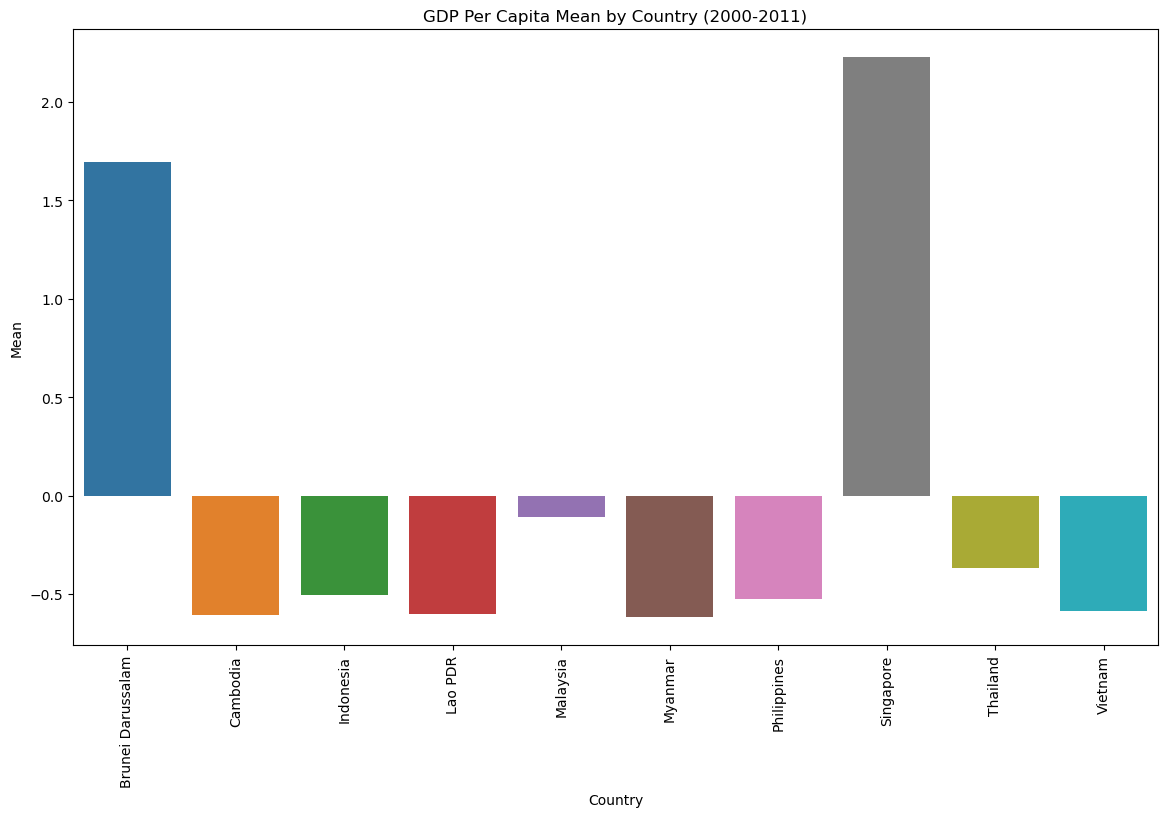

In [156]:
gdp_mean_by_country = gdp_per_capita.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(gdp_mean_by_country, 'Mean', 'GDP Per Capita Mean by Country (2000-2011)')

#### GDP Analysis

There seems to be a massive disparity between Singapore and Brunei compared to the rest of the Southeast Asian countries. Note that this does not mean the other countries are poor in terms of absolute terms but they are relatively poorer than the countries mentioned. This suggests that the regional average is heavily influenced by Singapore and Brunei.

In [157]:
co2_summary_by_country = co2_emission.groupby('Country').describe()
co2_summary_by_country

2000                                    \
                                 count      mean std       min       25%   
Country                                                                    
Brunei Darussalam                  1.0 -0.920587 NaN -0.920587 -0.920587   
Cambodia                           1.0 -0.973943 NaN -0.973943 -0.973943   
Indonesia                          1.0  2.404405 NaN  2.404405  2.404405   
Lao People's Democratic Republic   1.0 -0.986926 NaN -0.986926 -0.986926   
Malaysia                           1.0  0.636478 NaN  0.636478  0.636478   
Myanmar                            1.0 -0.869128 NaN -0.869128 -0.869128   
Philippines                        1.0 -0.052213 NaN -0.052213 -0.052213   
Singapore                          1.0 -0.366232 NaN -0.366232 -0.366232   
Thailand                           1.0  1.434439 NaN  1.434439  1.434439   
Viet Nam                           1.0 -0.306291 NaN -0.306291 -0.306291   

                                                                2001  \
                                       50%       75%       max count   
Country                                                                
Brunei Darussalam                -0.920587 -0.920587 -0.920587   1.0   
Cambodia                         -0.973943 -0.973943 -0.973943   1.0   
Indonesia                         2.404405  2.404405  2.404405   1.0   
Lao People's Democratic Republic -0.986926 -0.986926 -0.986926   1.0   
Malaysia                          0.636478  0.636478  0.636478   1.0   
Myanmar                          -0.869128 -0.869128 -0.869128   1.0   
Philippines                      -0.052213 -0.052213 -0.052213   1.0   
Singapore                        -0.366232 -0.366232 -0.366232   1.0   
Thailand                          1.434439  1.434439  1.434439   1.0   
Viet Nam                         -0.306291 -0.306291 -0.306291   1.0   

                                            ...      2010            2011  \
                                      mean  ...       75%       max count   
Country                                     ...                             
Brunei Darussalam                -0.903299  ... -0.867224 -0.867224   1.0   
Cambodia                         -0.944085  ... -0.900662 -0.900662   1.0   
Indonesia                         2.464382  ...  2.377139  2.377139   1.0   
Lao People's Democratic Republic -0.959801  ... -0.922742 -0.922742   1.0   
Malaysia                          0.621987  ...  0.768566  0.768566   1.0   
Myanmar                          -0.868705  ... -0.864308 -0.864308   1.0   
Philippines                      -0.142791  ... -0.313610 -0.313610   1.0   
Singapore                        -0.393318  ... -0.830287 -0.830287   1.0   
Thailand                          1.383861  ...  1.325624  1.325624   1.0   
Viet Nam                         -0.258232  ...  0.227505  0.227505   1.0   

                                                                              \
                                      mean std       min       25%       50%   
Country                                                                        
Brunei Darussalam                -0.816921 NaN -0.816921 -0.816921 -0.816921   
Cambodia                         -0.849919 NaN -0.849919 -0.849919 -0.849919   
Indonesia                         2.668309 NaN  2.668309  2.668309  2.668309   
Lao People's Democratic Republic -0.870626 NaN -0.870626 -0.870626 -0.870626   
Malaysia                          0.541032 NaN  0.541032  0.541032  0.541032   
Myanmar                          -0.812540 NaN -0.812540 -0.812540 -0.812540   
Philippines                      -0.362471 NaN -0.362471 -0.362471 -0.362471   
Singapore                        -0.737367 NaN -0.737367 -0.737367 -0.737367   
Thailand                          1.029494 NaN  1.029494  1.029494  1.029494   
Viet Nam                          0.211010 NaN  0.211010  0.211010  0.211010   

                                                      
          

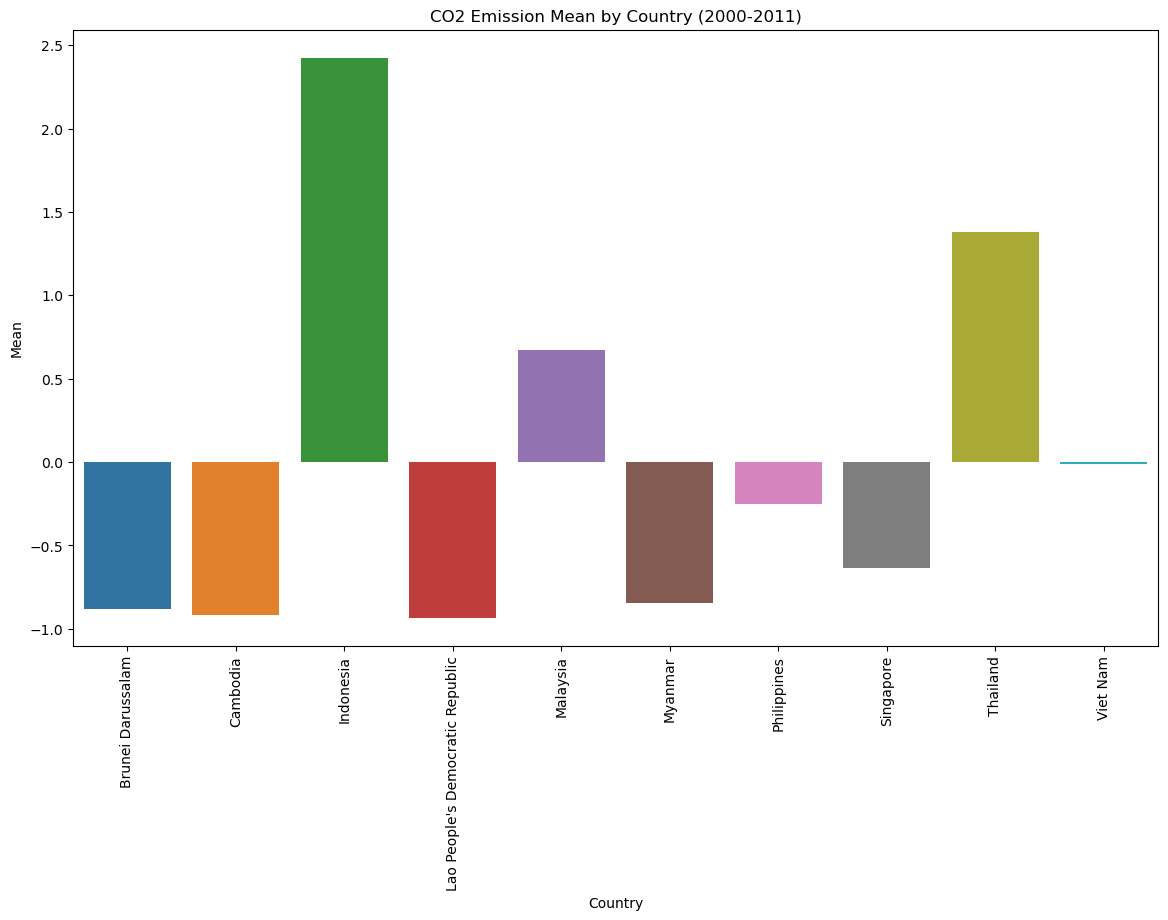

In [158]:
co2_mean_by_country = co2_emission.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(co2_mean_by_country, 'Mean', 'CO2 Emission Mean by Country (2000-2011)')

#### CO2 Analysis

Indonesia, Malaysia and Thailand stand out the most in this chart. They pump out the most carbon dioxide in South East Asia. 

In [159]:
energy_summary_by_country = energy_used.groupby('Country').describe()
energy_summary_by_country

2000                                                        \
                  count      mean std       min       25%       50%       75%   
Country                                                                         
Brunei Darussalam   1.0 -1.292568 NaN -1.292568 -1.292568 -1.292568 -1.292568   
Cambodia            1.0  2.783267 NaN  2.783267  2.783267  2.783267  2.783267   
Indonesia           1.0  0.103783 NaN  0.103783  0.103783  0.103783  0.103783   
Lao PDR             1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
Malaysia            1.0 -0.084913 NaN -0.084913 -0.084913 -0.084913 -0.084913   
Myanmar             1.0  0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
Philippines         1.0 -0.349088 NaN -0.349088 -0.349088 -0.349088 -0.349088   
Singapore           1.0 -1.519003 NaN -1.519003 -1.519003 -1.519003 -1.519003   
Thailand            1.0 -0.009435 NaN -0.009435 -0.009435 -0.009435 -0.009435   
Viet Nam            1.0  0.367957 NaN  0.367957  0.367957  0.367957  0.367957   

                             2001            ...      2010            2011  \
                        max count      mean  ...       75%       max count   
Country                                      ...                             
Brunei Darussalam -1.292568   1.0 -1.779502  ... -0.190660 -0.190660   1.0   
Cambodia           2.783267   1.0  2.623831  ...  1.071642  1.071642   1.0   
Indonesia          0.103783   1.0  0.144284  ... -0.506236 -0.506236   1.0   
Lao PDR            0.000000   1.0  0.000000  ...  0.000000  0.000000   1.0   
Malaysia          -0.084913   1.0  0.187035  ...  0.387895  0.387895   1.0   
Myanmar            0.000000   1.0  0.000000  ...  0.000000  0.000000   1.0   
Philippines       -0.349088   1.0 -0.667981  ... -2.189305 -2.189305   1.0   
Singapore         -1.519003   1.0 -1.095489  ... -1.295175 -1.295175   1.0   
Thailand          -0.009435   1.0  0.101533  ...  1.019046  1.019046   1.0   
Viet Nam           0.367957   1.0  0.486290  ...  1.702793  1.702793   1.0   

                                                                         \
                       mean std       min       25%       50%       75%   
Country                                                                   
Brunei Darussalam  0.623422 NaN  0.623422  0.623422  0.623422  0.623422   
Cambodia           0.959110 NaN  0.959110  0.959110  0.959110  0.959110   
Indonesia         -0.767288 NaN -0.767288 -0.767288 -0.767288 -0.767288   
Lao PDR            0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
Malaysia           0.335689 NaN  0.335689  0.335689  0.335689  0.335689   
Myanmar            0.000000 NaN  0.000000  0.000000  0.000000  0.000000   
Philippines       -2.110043 NaN -2.110043 -2.110043 -2.110043 -2.110043   
Singapore         -1.534577 NaN -1.534577 -1.534577 -1.534577 -1.534577   
Thailand           1.055021 NaN  1.055021  1.055021  1.055021  1.055021   
Viet Nam           1.438666 NaN  1.438666  1.438666  1.438666  1.438666   

                             
                        max  
Country                      
Brunei Darussalam  0.623422  
Cambodia           0.959110  
Indonesia         -0.767288  
Lao PDR            0.000000  
Malaysia           0.335689  
Myanmar            0.000000  
Philippines       -2.110043  
Singapore         -1.534577  
Thailand           1.055021  
Viet Nam           1.438666  

[10 rows x 96 columns]

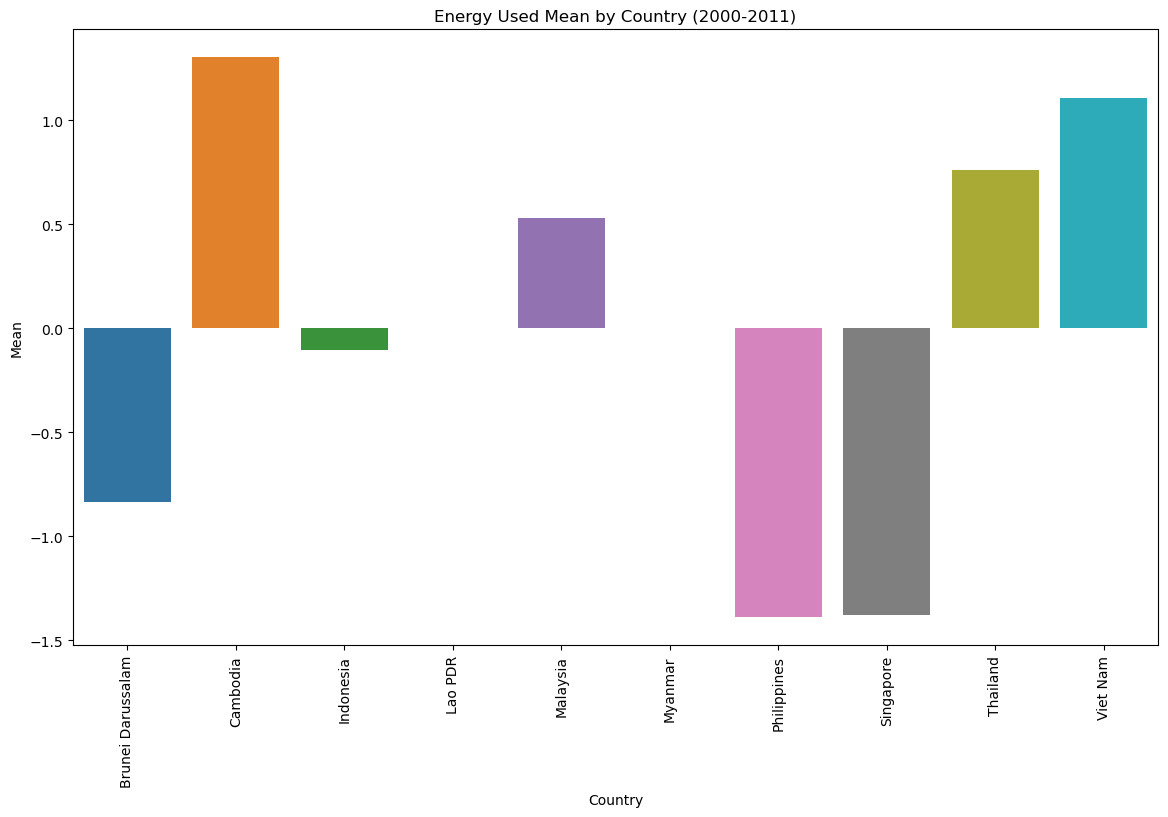

In [160]:
energy_mean_by_country = energy_used.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(energy_mean_by_country, 'Mean', 'Energy Used Mean by Country (2000-2011)')

#### Energy Analysis

What stands out is the Philippines and Singapore using the least amount of energy. As a person who has experienced both countries, my hypothesis is that Singapore is a manufacturing hub that has mastered energy efficiency and that being a relatively small country compared to others. The Philippines on the other hand, has a lackluster manufacturing due to electricity being so much costlier than the other Southeast Asian countries. Because of this, manufacturing isn't something that the oligarchs invest on which could probably explain why they are relatively low when it comes to energy usage.

In [161]:
food_summary_by_country = food_production_index.groupby('Country').describe()
food_summary_by_country

2000                                                        \
                  count      mean std       min       25%       50%       75%   
Country                                                                         
Brunei Darussalam   1.0  0.714434 NaN  0.714434  0.714434  0.714434  0.714434   
Cambodia            1.0 -0.801414 NaN -0.801414 -0.801414 -0.801414 -0.801414   
Indonesia           1.0 -0.161670 NaN -0.161670 -0.161670 -0.161670 -0.161670   
Lao PDR             1.0  0.374077 NaN  0.374077  0.374077  0.374077  0.374077   
Malaysia            1.0 -0.208941 NaN -0.208941 -0.208941 -0.208941 -0.208941   
Myanmar             1.0 -1.012562 NaN -1.012562 -1.012562 -1.012562 -1.012562   
Philippines         1.0  0.802675 NaN  0.802675  0.802675  0.802675  0.802675   
Singapore           1.0 -1.478977 NaN -1.478977 -1.478977 -1.478977 -1.478977   
Thailand            1.0  2.153073 NaN  2.153073  2.153073  2.153073  2.153073   
Vietnam             1.0 -0.380695 NaN -0.380695 -0.380695 -0.380695 -0.380695   

                             2001            ...      2010            2011  \
                        max count      mean  ...       75%       max count   
Country                                      ...                             
Brunei Darussalam  0.714434   1.0  1.683269  ...  1.164524  1.164524   1.0   
Cambodia          -0.801414   1.0 -1.026925  ...  1.707630  1.707630   1.0   
Indonesia         -0.161670   1.0 -0.345788  ...  0.120351  0.120351   1.0   
Lao PDR            0.374077   1.0  0.078292  ...  0.304098  0.304098   1.0   
Malaysia          -0.208941   1.0 -0.101779  ... -0.484456 -0.484456   1.0   
Myanmar           -1.012562   1.0 -0.598931  ...  0.684476  0.684476   1.0   
Philippines        0.802675   1.0  0.598931  ... -0.643116 -0.643116   1.0   
Singapore         -1.478977   1.0 -1.628465  ... -2.023594 -2.023594   1.0   
Thailand           2.153073   1.0  1.594539  ... -0.594975 -0.594975   1.0   
Vietnam           -0.380695   1.0 -0.253143  ... -0.234939 -0.234939   1.0   

                                                                         \
                       mean std       min       25%       50%       75%   
Country                                                                   
Brunei Darussalam  1.082305 NaN  1.082305  1.082305  1.082305  1.082305   
Cambodia           2.181468 NaN  2.181468  2.181468  2.181468  2.181468   
Indonesia         -0.217265 NaN -0.217265 -0.217265 -0.217265 -0.217265   
Lao PDR            0.496159 NaN  0.496159  0.496159  0.496159  0.496159   
Malaysia          -0.313281 NaN -0.313281 -0.313281 -0.313281 -0.313281   
Myanmar            0.079716 NaN  0.079716  0.079716  0.079716  0.079716   
Philippines       -0.790013 NaN -0.790013 -0.790013 -0.790013 -0.790013   
Singapore         -1.625690 NaN -1.625690 -1.625690 -1.625690 -1.625690   
Thailand          -0.500848 NaN -0.500848 -0.500848 -0.500848 -0.500848   
Vietnam           -0.392550 NaN -0.392550 -0.392550 -0.392550 -0.392550   

                             
                        max  
Country                      
Brunei Darussalam  1.082305  
Cambodia           2.181468  
Indonesia         -0.217265  
Lao PDR            0.496159  
Malaysia          -0.313281  
Myanmar            0.079716  
Philippines       -0.790013  
Singapore         -1.625690  
Thailand          -0.500848  
Vietnam           -0.392550  

[10 rows x 96 columns]

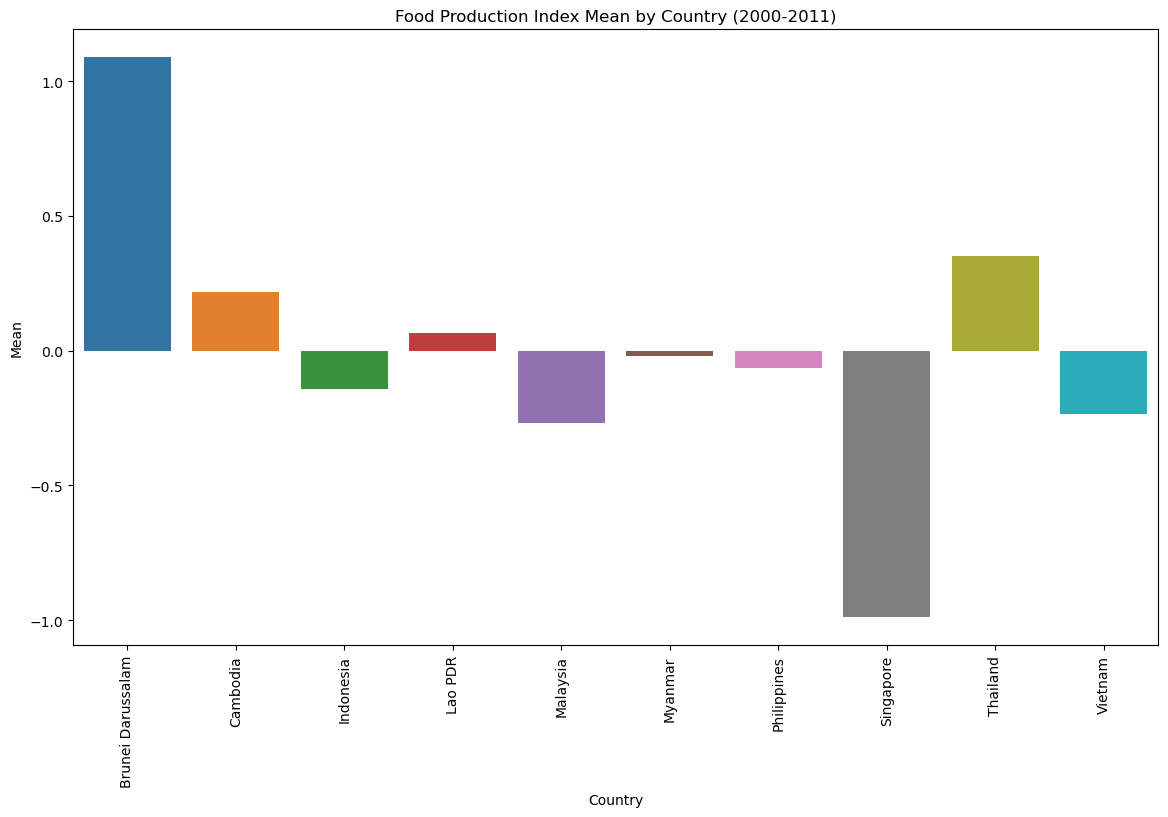

In [162]:
food_mean_by_country = food_production_index.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(food_mean_by_country, 'Mean', 'Food Production Index Mean by Country (2000-2011)')

#### Food Production Analysis

I expected Thailand and Vietnam to dominate the charts but I remembered the chart was from 2000 to 2011 so they weren't a powerhouse yet. What stands out is Brunei as it produces the most food relative to other countries. I don't know much about Brunei but based on the numbers, they seem to be a country that performs well on the factors that I chose. I wonder why it isn't as powerful as other countries. 

For Singapore, I completely expected it because the country is so small, there is almost no land for agriculture at all. They heavily rely on trade, financial and business service performance and in exchange, they import food. 

For the Philippines, it is underperforming relative to the other Southeast Asian countries which is terrible for an "agricultural" country. Although I have thought long and hard about it, there are claims that the Philippines is not an agricultural country at all. We might have the land but we do not have large river deltas that Thailand and Vietnam have to mass produce rice for instance. Add that to the fact that the Philippines is a typhoon hub and those natural disasters can easily destroy crops in unfortunate times. Filipinos go crazy when they hear that we import rice from other countries but the numbers suggest that even back a decade or two ago, agriculture might not be our strong suit. I was told when I was young that the Philippines is a perfect country for agriculture because we don't have winter season. One can theoretically plant and harvest all year long. Apparently, this claim is closer to being incorrect.

In [163]:
forest_summary_by_country = forest_area.groupby('Country').describe()
forest_summary_by_country 

2000                                                        \
                  count      mean std       min       25%       50%       75%   
Country                                                                         
Brunei Darussalam   1.0  1.343458 NaN  1.343458  1.343458  1.343458  1.343458   
Cambodia            1.0  0.806183 NaN  0.806183  0.806183  0.806183  0.806183   
Indonesia           1.0  0.235329 NaN  0.235329  0.235329  0.235329  0.235329   
Lao PDR             1.0  1.141439 NaN  1.141439  1.141439  1.141439  1.141439   
Malaysia            1.0  0.822973 NaN  0.822973  0.822973  0.822973  0.822973   
Myanmar             1.0  0.153004 NaN  0.153004  0.153004  0.153004  0.153004   
Philippines         1.0 -1.459904 NaN -1.459904 -1.459904 -1.459904 -1.459904   
Singapore           1.0 -1.414951 NaN -1.414951 -1.414951 -1.414951 -1.414951   
Thailand            1.0 -0.932920 NaN -0.932920 -0.932920 -0.932920 -0.932920   
Vietnam             1.0 -0.694612 NaN -0.694612 -0.694612 -0.694612 -0.694612   

                             2001            ...      2010            2011  \
                        max count      mean  ...       75%       max count   
Country                                      ...                             
Brunei Darussalam  1.343458   1.0  1.346217  ...  1.211988  1.211988   1.0   
Cambodia           0.806183   1.0  0.770617  ...  0.400226  0.400226   1.0   
Indonesia          0.235329   1.0  0.235974  ...  0.125652  0.125652   1.0   
Lao PDR            1.141439   1.0  1.175285  ...  1.488194  1.488194   1.0   
Malaysia           0.822973   1.0  0.814306  ...  0.952637  0.952637   1.0   
Myanmar            0.153004   1.0  0.136582  ... -0.064104 -0.064104   1.0   
Philippines       -1.459904   1.0 -1.462430  ... -1.461443 -1.461443   1.0   
Singapore         -1.414951   1.0 -1.418741  ... -1.442413 -1.442413   1.0   
Thailand          -0.932920   1.0 -0.952362  ... -0.979171 -0.979171   1.0   
Vietnam           -0.694612   1.0 -0.645448  ... -0.231567 -0.231567   1.0   

                                                                         \
                       mean std       min       25%       50%       75%   
Country                                                                   
Brunei Darussalam  1.212392 NaN  1.212392  1.212392  1.212392  1.212392   
Cambodia           0.360741 NaN  0.360741  0.360741  0.360741  0.360741   
Indonesia          0.104429 NaN  0.104429  0.104429  0.104429  0.104429   
Lao PDR            1.533461 NaN  1.533461  1.533461  1.533461  1.533461   
Malaysia           0.954992 NaN  0.954992  0.954992  0.954992  0.954992   
Myanmar           -0.110524 NaN -0.110524 -0.110524 -0.110524 -0.110524   
Philippines       -1.419835 NaN -1.419835 -1.419835 -1.419835 -1.419835   
Singapore         -1.448133 NaN -1.448133 -1.448133 -1.448133 -1.448133   
Thailand          -0.977956 NaN -0.977956 -0.977956 -0.977956 -0.977956   
Vietnam           -0.209566 NaN -0.209566 -0.209566 -0.209566 -0.209566   

                             
                        max  
Country                      
Brunei Darussalam  1.212392  
Cambodia           0.360741  
Indonesia          0.104429  
Lao PDR            1.533461  
Malaysia           0.954992  
Myanmar           -0.110524  
Philippines       -1.419835  
Singapore         -1.448133  
Thailand          -0.977956  
Vietnam           -0.209566  

[10 rows x 96 columns]

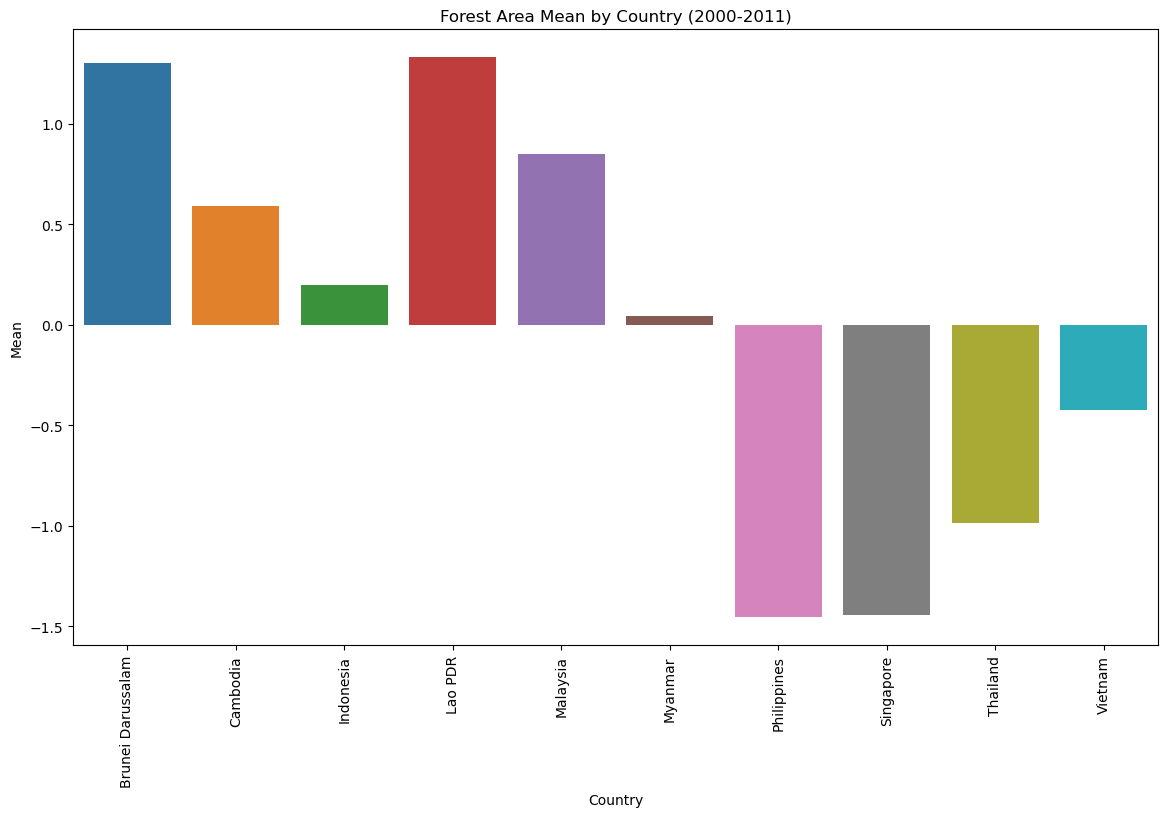

In [164]:
forest_mean_by_country = forest_area.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(forest_mean_by_country, 'Mean', 'Forest Area Mean by Country (2000-2011)')

#### Forest Area Analysis

Based on the charts, Brunei and Laos have relatively equal forest area on the positive end. Brunei has been performing well so far and Laos looks like a very underdeveloped country. I wonder how Brunei is performing so well. 
Another thing that I noticed is the Philippines and Singapore tied when it comes to forest area. I am slightly worried because the identity of the Philippines is that it is home to a lot of endemic species of both flora and fauna. I have always been pro-environment but as I grew up, I understood why people are cutting down trees. Preserving forests, unfortunately, do not bring in enough money and people would rather build farms, buildings and other businesses that have a better economic tradeoff than preserving them. 

In [165]:
hdi_summary_by_country = hdi.groupby('Country').describe()
hdi_summary_by_country

2000                                                        \
                  count      mean std       min       25%       50%       75%   
Country                                                                         
Brunei Darussalam   1.0  1.385896 NaN  1.385896  1.385896  1.385896  1.385896   
Cambodia            1.0 -1.341741 NaN -1.341741 -1.341741 -1.341741 -1.341741   
Indonesia           1.0 -0.131041 NaN -0.131041 -0.131041 -0.131041 -0.131041   
Lao PDR             1.0 -1.021262 NaN -1.021262 -1.021262 -1.021262 -1.021262   
Malaysia            1.0  0.766302 NaN  0.766302  0.766302  0.766302  0.766302   
Myanmar             1.0 -1.448568 NaN -1.448568 -1.448568 -1.448568 -1.448568   
Philippines         1.0  0.139587 NaN  0.139587  0.139587  0.139587  0.139587   
Singapore           1.0  1.549697 NaN  1.549697  1.549697  1.549697  1.549697   
Thailand            1.0  0.282022 NaN  0.282022  0.282022  0.282022  0.282022   
Vietnam             1.0 -0.180893 NaN -0.180893 -0.180893 -0.180893 -0.180893   

                             2001            ...      2010            2011  \
                        max count      mean  ...       75%       max count   
Country                                      ...                             
Brunei Darussalam  1.385896   1.0  1.377460  ...  1.165105  1.165105   1.0   
Cambodia          -1.341741   1.0 -1.311693  ... -1.174855 -1.174855   1.0   
Indonesia         -0.131041   1.0 -0.120573  ... -0.167372 -0.167372   1.0   
Lao PDR           -1.021262   1.0 -1.055931  ... -1.085482 -1.085482   1.0   
Malaysia           0.766302   1.0  0.741709  ...  0.685738  0.685738   1.0   
Myanmar           -1.448568   1.0 -1.465150  ... -1.418601 -1.418601   1.0   
Philippines        0.139587   1.0  0.127881  ... -0.086124 -0.086124   1.0   
Singapore          1.549697   1.0  1.552839  ...  1.831344  1.831344   1.0   
Thailand           0.282022   1.0  0.317875  ...  0.425743  0.425743   1.0   
Vietnam           -0.180893   1.0 -0.164418  ... -0.175497 -0.175497   1.0   

                                                                         \
                       mean std       min       25%       50%       75%   
Country                                                                   
Brunei Darussalam  1.163286 NaN  1.163286  1.163286  1.163286  1.163286   
Cambodia          -1.184783 NaN -1.184783 -1.184783 -1.184783 -1.184783   
Indonesia         -0.167837 NaN -0.167837 -0.167837 -0.167837 -0.167837   
Lao PDR           -1.060765 NaN -1.060765 -1.060765 -1.060765 -1.060765   
Malaysia           0.675483 NaN  0.675483  0.675483  0.675483  0.675483   
Myanmar           -1.408015 NaN -1.408015 -1.408015 -1.408015 -1.408015   
Philippines       -0.101695 NaN -0.101695 -0.101695 -0.101695 -0.101695   
Singapore          1.849518 NaN  1.849518  1.849518  1.849518  1.849518   
Thailand           0.427448 NaN  0.427448  0.427448  0.427448  0.427448   
Vietnam           -0.192641 NaN -0.192641 -0.192641 -0.192641 -0.192641   

                             
                        max  
Country                      
Brunei Darussalam  1.163286  
Cambodia          -1.184783  
Indonesia         -0.167837  
Lao PDR           -1.060765  
Malaysia           0.675483  
Myanmar           -1.408015  
Philippines       -0.101695  
Singapore          1.849518  
Thailand           0.427448  
Vietnam           -0.192641  

[10 rows x 96 columns]

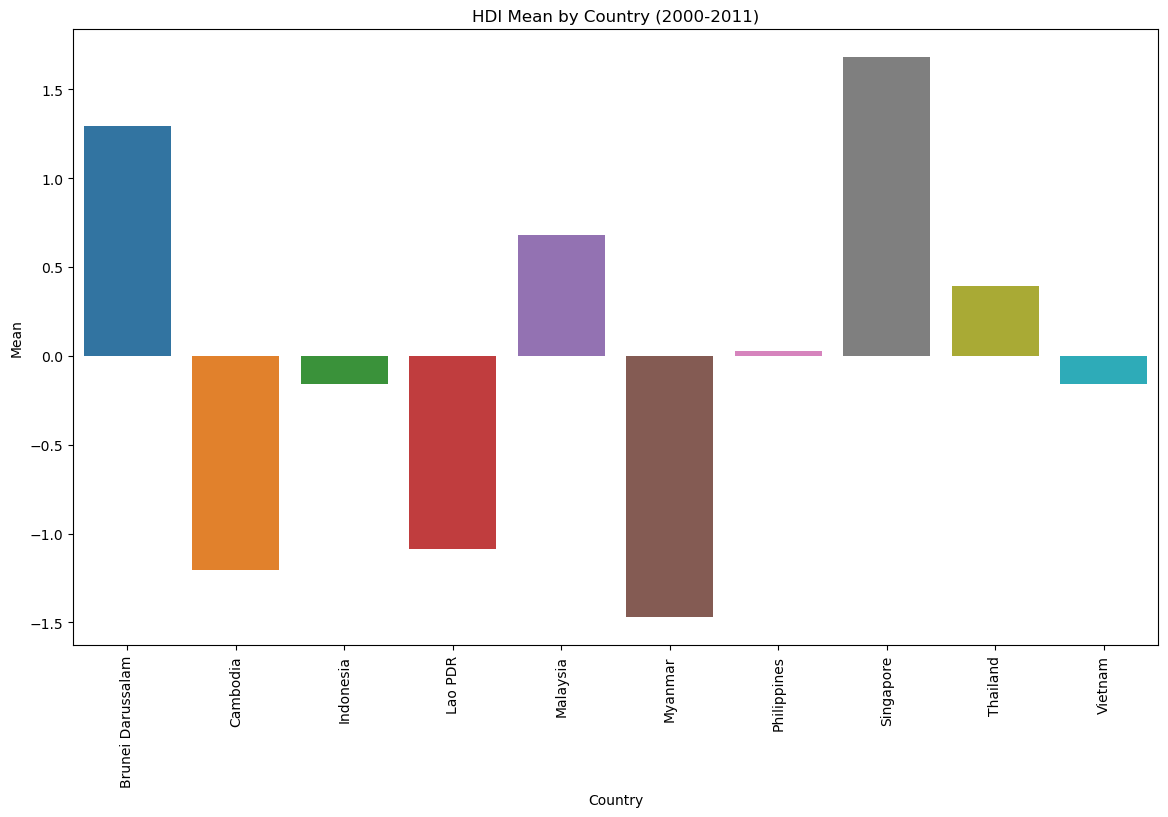

In [166]:
hdi_mean_by_country = hdi.groupby('Country').mean().mean(axis=1).reset_index(name='Mean')
plot_summary_statistics_by_country(hdi_mean_by_country, 'Mean', 'HDI Mean by Country (2000-2011)')

#### HDI Analysis

Not surprised that Brunei and Singapore lead the way when it comes to HDI. GDP and HDI seem to have a strong correlation. 

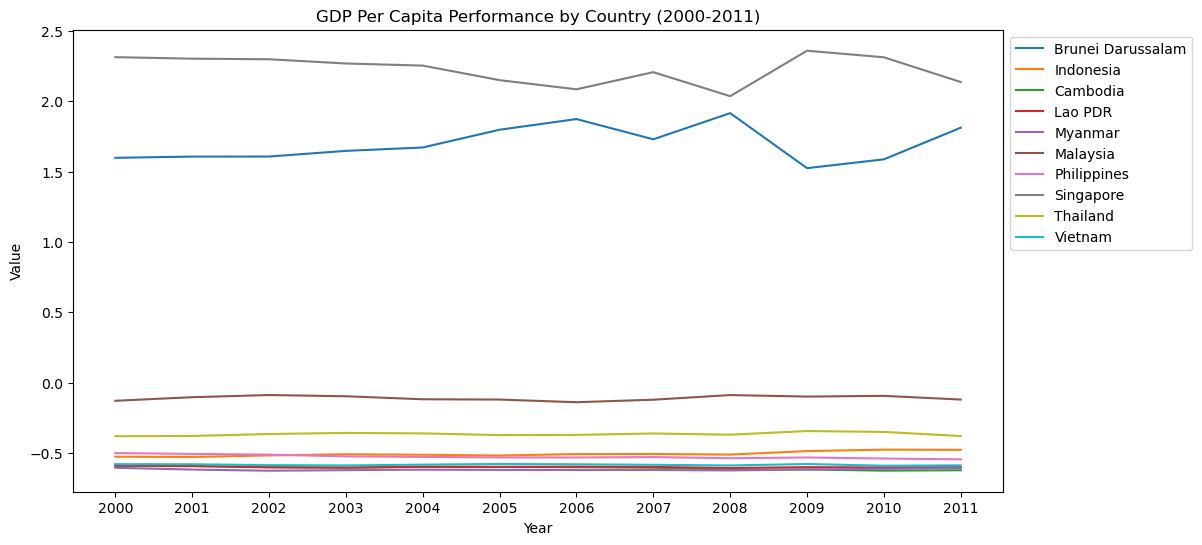

In [167]:
def plot_performance_by_country(df, title):
    plt.figure(figsize=(12, 6))
    for country in df['Country']:
        country_data = df[df['Country'] == country].iloc[:, 1:].T
        plt.plot(country_data.index, country_data.values, label=country)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Plot each factor by country
plot_performance_by_country(gdp_per_capita, 'GDP Per Capita Performance by Country (2000-2011)')

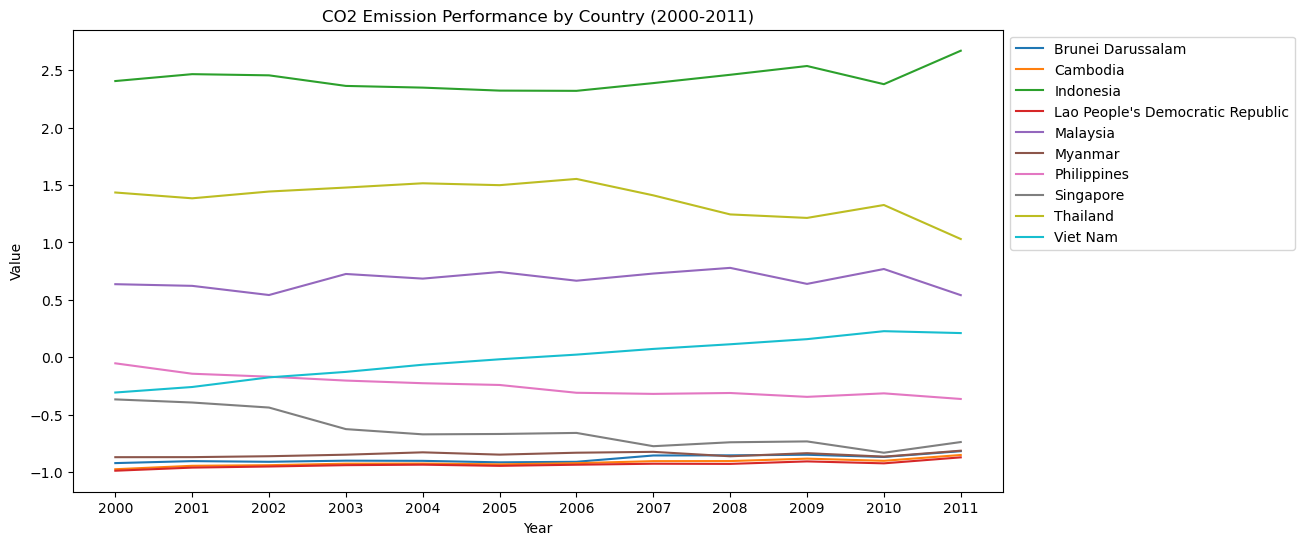

In [168]:
plot_performance_by_country(co2_emission, 'CO2 Emission Performance by Country (2000-2011)')

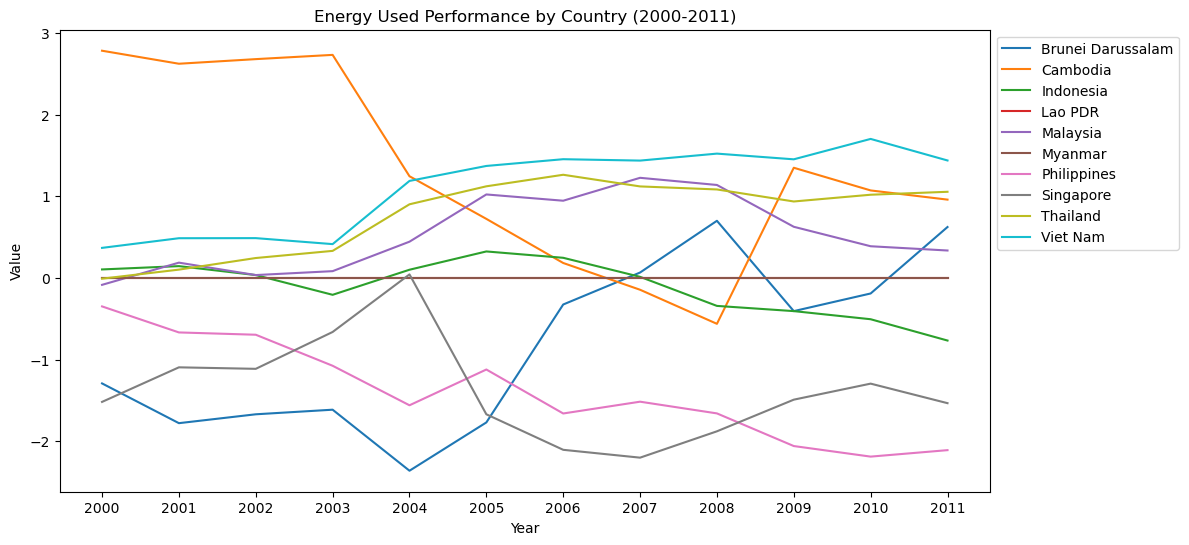

In [169]:
plot_performance_by_country(energy_used, 'Energy Used Performance by Country (2000-2011)')

#### Energy Analysis

I don't why why Brunei has a straight line from 2000 to 2001. Seems odd. Cambodia had a steep fall off to their usual energy consumption from 2004 to 2008, I think something happened along the way. Indonesia seems to be trending from middle to low which is a good thing. Singapore had a huge spike in energy from 2002 to 2004, I think something happened around that time too. Philippines has been consistently trending downwards in this time span or other countries could be spending more energy while Philippines maintains its usual consumption which makes it seem like its trending downwards.

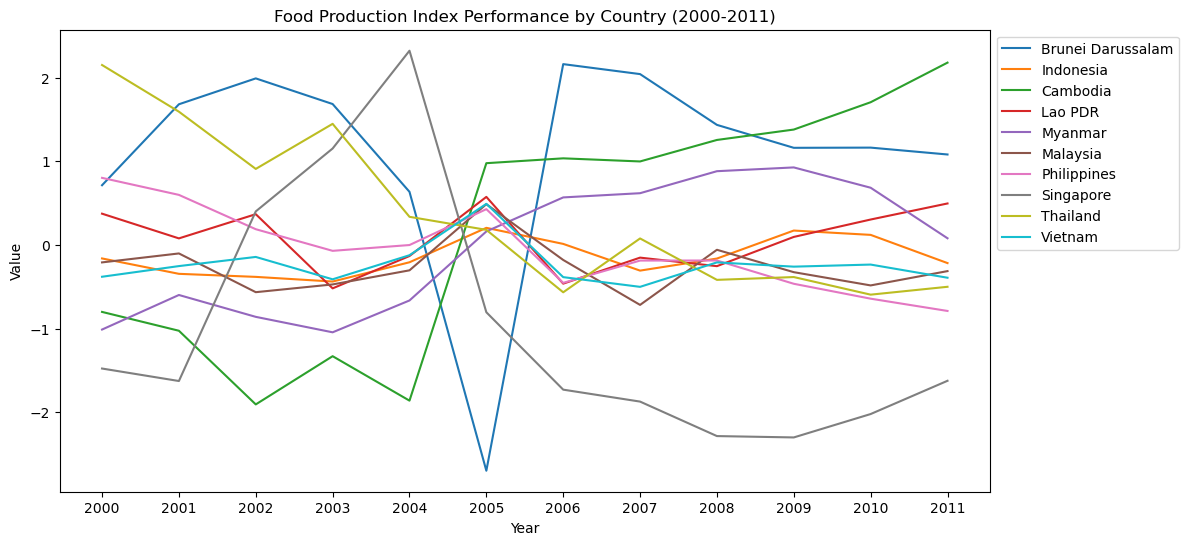

In [170]:
plot_performance_by_country(food_production_index, 'Food Production Index Performance by Country (2000-2011)')

#### Food Production Analysis

There are huge fluctuations on this chart specificaly Brunei, Singapore, Cambodia. All in all Brunei was a food production power house and something happened in 2005 that made them the worst food producing country that year and went back up first place the year after. Something definetely happened that year. I was surprised that Singapore was once upon a time, a top food produced and then came down to its usual numbers. Something happened in 2004 for Singapore for sure. Lastly, there was a huge improvement for Cambodia in terms of food production between 2004 and 2005. 


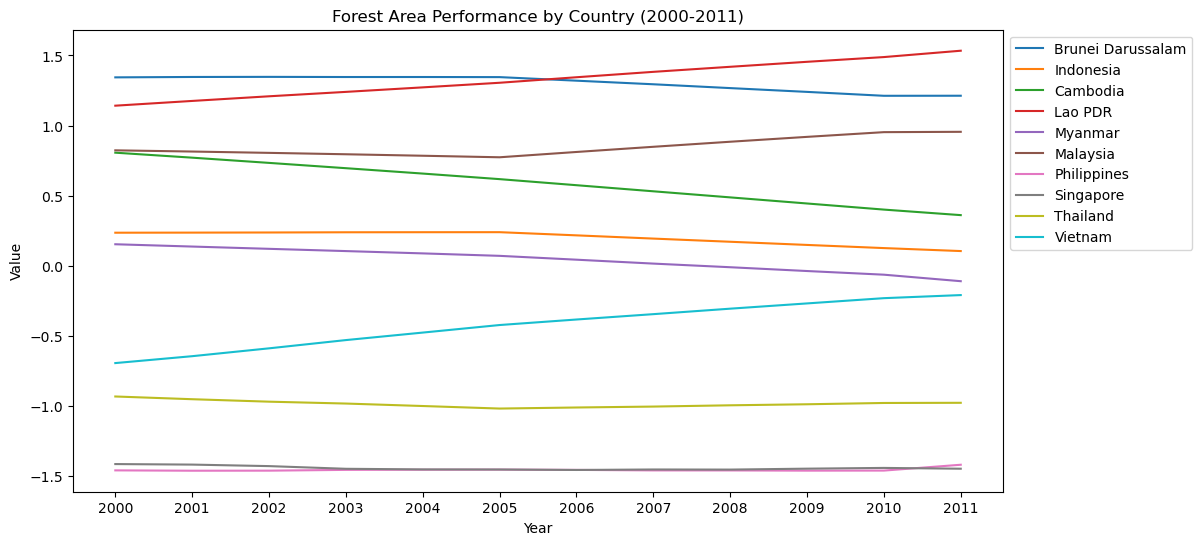

In [171]:
plot_performance_by_country(forest_area, 'Forest Area Performance by Country (2000-2011)')

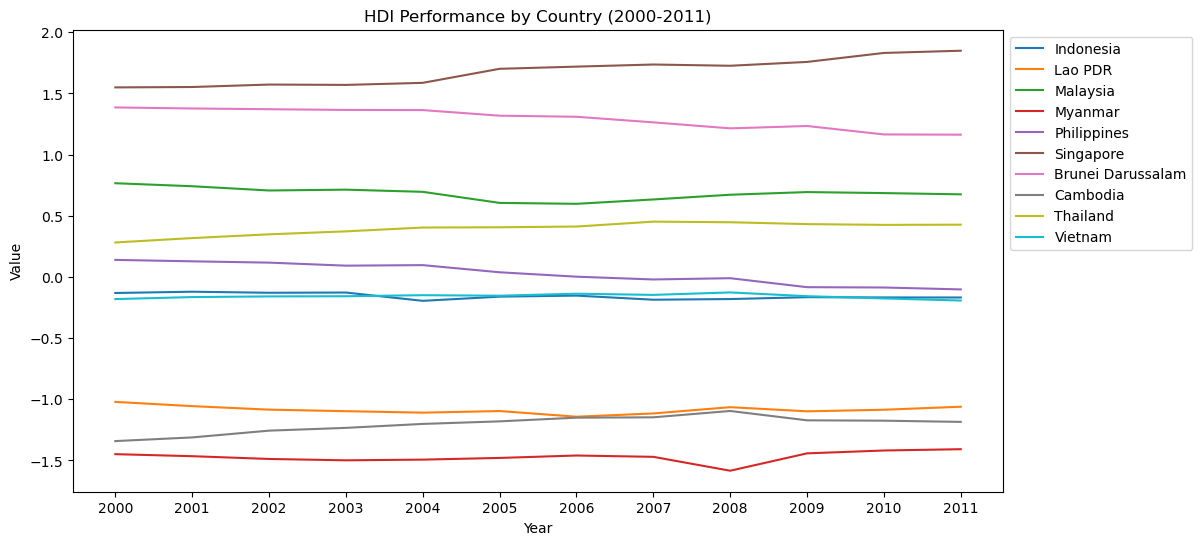

In [172]:
plot_performance_by_country(hdi, 'HDI Performance by Country (2000-2011)')

5. Perform correlation analysis.

In [173]:
# Combine datasets into a single DataFrame
combined_df = pd.DataFrame()

# Add Country and Year columns for merging
for df, name in zip([gdp_per_capita, co2_emission, energy_used, food_production_index, forest_area, hdi],
                    ['GDP', 'CO2', 'Energy', 'Food', 'Forest', 'HDI']):
    temp_df = df.melt(id_vars=['Country'], var_name='Year', value_name=name)
    if combined_df.empty:
        combined_df = temp_df
    else:
        combined_df = pd.merge(combined_df, temp_df, on=['Country', 'Year'], how='outer')

# Convert Year to integer
combined_df['Year'] = combined_df['Year'].astype(int)

# Display the first few rows of the combined dataframe
combined_df.head(20)


,Country,Year,GDP,CO2,Energy,Food,Forest,HDI
0,Brunei Darussalam,2000,1.597592,-0.920587,-1.292568,0.714434,1.343458,1.385896
1,Indonesia,2000,-0.527468,2.404405,0.103783,-0.161670,0.235329,-0.131041
2,Cambodia,2000,-0.593021,-0.973943,2.783267,-0.801414,0.806183,-1.341741
3,Lao PDR,2000,-0.590032,NaN,0.000000,0.374077,1.141439,-1.021262
4,Myanmar,2000,-0.606320,-0.869128,0.000000,-1.012562,0.153004,-1.448568
5,Malaysia,2000,-0.129794,0.636478,-0.084913,-0.208941,0.822973,0.766302
6,Philippines,2000,-0.501696,-0.052213,-0.349088,0.802675,-1.459904,0.139587
7,Singapore,2000,2.313146,-0.366232,-1.519003,-1.478977,-1.414951,1.549697
8,Thailand,2000,-0.381864,1.434439,-0.009435,2.153073,-0.932920,0.282022
9,Vietnam,2000,-0.580544,NaN,NaN,-0.380695,-0.694612,-0.180893


In [174]:
# Calculate the correlation matrix
correlation_matrix = combined_df.drop(columns=['Country', 'Year']).corr()

# Display the correlation matrix
correlation_matrix


,GDP,CO2,Energy,Food,Forest,HDI
GDP,1.000000,-0.364180,-0.466580,-0.036992,-0.100421,0.816344
CO2,-0.364180,1.000000,0.177145,-0.036222,-0.069866,0.061129
Energy,-0.466580,0.177145,1.000000,0.086935,0.346337,-0.434315
Food,-0.036992,-0.036222,0.086935,1.000000,0.242100,-0.057520
Forest,-0.100421,-0.069866,0.346337,0.242100,1.000000,-0.277524
HDI,0.816344,0.061129,-0.434315,-0.057520,-0.277524,1.000000


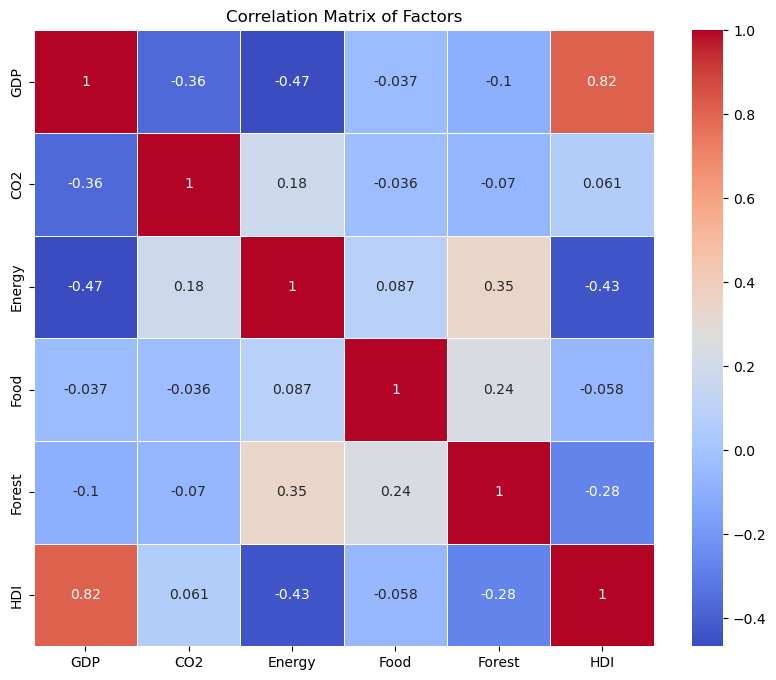

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Factors')
plt.show()


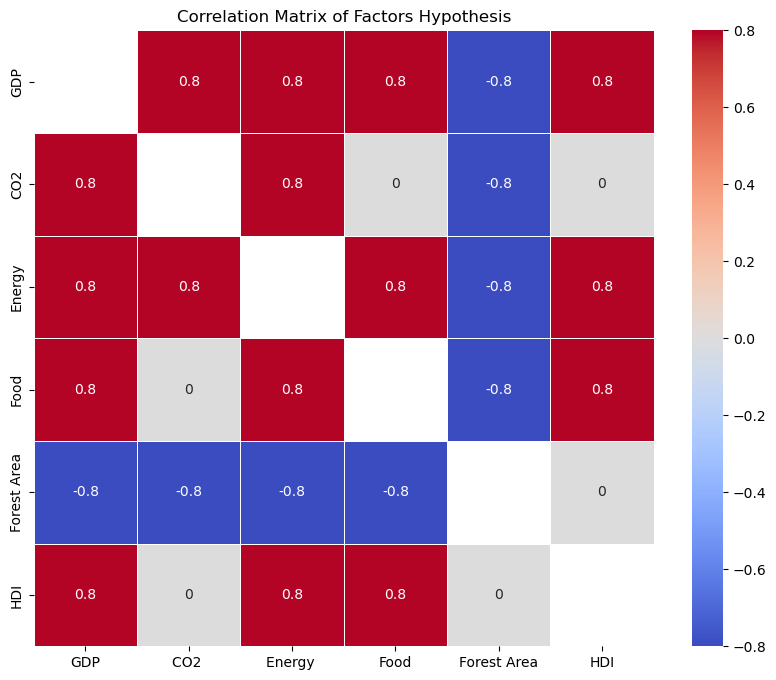

In [176]:
# Plot the correlation matrix
def create_custom_hypothesis_df():
    hypothesis_values = {
        'GDP': [np.nan, 0.8, 0.8, 0.8, -0.8, 0.8],
        'CO2 ': [0.8, np.nan, 0.8, 0.0, -0.8, 0.0],
        'Energy ': [0.8, 0.8, np.nan, 0.8, -0.8, 0.8],
        'Food': [0.8, 0.0, 0.8, np.nan, -0.8, 0.8],
        'Forest Area': [-0.8, -0.8, -0.8, -0.8, np.nan, 0.0],
        'HDI': [0.8, 0.0, 0.8, 0.8, 0.0, np.nan]
    }
    hypothesis_df = pd.DataFrame(hypothesis_values, index=['GDP', 'CO2', 'Energy', 'Food', 'Forest Area', 'HDI'])
    return hypothesis_df
custom_hypothesis_df = create_custom_hypothesis_df()
plt.figure(figsize=(10, 8))
sns.heatmap(custom_hypothesis_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Factors Hypothesis')
plt.show()

#### Correlation Matrix Interpretation

GDP vs. HDI: There is a strong positive correlation (0.82). This suggests that higher GDP per capita is associated with higher Human Development Index (HDI) values. Generally, wealthier countries tend to have better human development outcomes.

GDP vs. Energy: There is a moderate negative correlation (-0.48). This might suggest that as GDP per capita increases, energy usage decreases, possibly indicating improved energy efficiency in wealthier countries.

GDP vs. CO2: There is a moderate negative correlation (-0.36). Higher GDP per capita is associated with lower CO2 emissions, which could suggest that wealthier countries may have better pollution control measures or a transition to cleaner energy sources.

Energy vs. HDI: There is a moderate negative correlation (-0.53). This indicates that higher energy consumption is associated with lower HDI, which might suggest inefficiencies or higher energy usage in less developed countries.

Energy vs. Forest: There is a moderate positive correlation (0.36). This could indicate that countries with more forest areas also tend to have higher energy consumption, possibly due to industrial or agricultural activities.

Forest vs. HDI: There is a weak negative correlation (-0.28). This suggests a slight tendency for countries with higher forest cover to have lower HDI, which might indicate less developed countries with larger forest areas.

CO2 vs. HDI: There is a weak positive correlation (0.061). This suggests a slight tendency for higher CO2 emissions to be associated with higher HDI, possibly indicating industrial activities that contribute to both development and emissions.

Food vs. Other Variables: The food production index shows very weak correlations with other variables, suggesting that food production may not be strongly associated with the other factors in the dataset.

# Summary and Learnings

The activity provided a comprehensive analysis of the selected datasets, revealing important trends and correlations within ASEAN countries. The insights gained from the descriptive and correlation analysis can inform policy decisions aimed at reducing economic inequality and promoting balanced growth in the region. The actual practice of Data Analysis is essential in gauging relative performance but there are certain limitations to this activity such as while we can measure how a country performs relatively to other countries, sometimes a country 'underperforming' could be interpreted as an not a 'bad' thing. For example, Singapore is the lowest when it comes to food production but due to it's identity as a very small country and the entire country is excellent on things not related to agriculture. Why would they invest in an industry that will set them up to fail? I think that is something the Philippines should take into consideration. What if we completely give up or at the very least lessen our expectations and investment on agriculture at all because it has been a losing battle? 

Another limitation of this analysis is its focus on relative performance rather than absolute measures. The datasets provided were composed of raw numbers without clear labels or units, which made it difficult to interpret certain data points, such as those in the 'energy used.csv' file. For example, it was unclear whether the energy usage figures represented kilowatt-hours per hour, per year, or some other unit. This lack of clarity can lead to misinterpretations. Additionally, the analysis did not account for factors like land mass and population size, which are critical for accurate comparisons. Without considering these variables, a country might be wrongly labeled as inefficient when, in fact, it performs comparably to more efficient countries on a per capita or per area basis.
